# Investment Analysis Case study

**Problem Statement**

An asset management company wants to make investments in a few companies. Presenting a case study for to understand the global trends in investments to enable effective investment decisions. 

## Business objective

The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

## Goals of data analysis
1. **Investment type analysis**: Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that the client can choose the type that is best suited for their strategy.
2. **Country analysis**: Identifying the countries which have been the most heavily invested in the past. 
3. **Sector analysis**: Understanding the distribution of investments across the eight main sectors


**Data source**

Real investment data was taken from crunchbase.com, in the form of 3 files <br>
1. Companies.txt:
2. Rounds2.csv: 
3. Mapping.csv: 

In [1]:
import pandas as pd
import numpy as np

In [5]:
companies = pd.read_csv('companies.txt', sep='\t',encoding = 'unicode_escape')
rounds2 = pd.read_csv('rounds2.csv',encoding = 'unicode_escape')

In [6]:
companies.shape

(66368, 10)

In [7]:
rounds2.shape

(114949, 6)

In [8]:
companies.dtypes

permalink        object
name             object
homepage_url     object
category_list    object
status           object
country_code     object
state_code       object
region           object
city             object
founded_at       object
dtype: object

In [9]:
companies['permalink'] = companies.permalink.astype(str).str.lower()

In [10]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [11]:
rounds2.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [12]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [13]:
rounds2['company_permalink'] = rounds2.company_permalink.astype(str).str.lower()

In [14]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [15]:
rounds2=rounds2.replace('\/organization\/\-','',regex=True)
rounds2=rounds2.replace('\/organization\/','',regex=True)

In [16]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [17]:
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [18]:
rounds2['company_permalink'].nunique()

66370

In [19]:
companies['permalink'].nunique()

66368

In [20]:
list(companies)

['permalink',
 'name',
 'homepage_url',
 'category_list',
 'status',
 'country_code',
 'state_code',
 'region',
 'city',
 'founded_at']

In [22]:
#remove non ascii characters 
rounds2['company_permalink']=rounds2['company_permalink'].apply(lambda x: ''.join(["" if ord(i) < 32 or ord(i) > 126 else i for i in x]))

In [21]:
rounds2['company_permalink'].unique()

array(['fame', 'qounter', 'the-one-of-them-inc-', ..., 'eron', 'asys-2',
       'novatiff-reklam-ve-tantm-hizmetleri-tic'], dtype=object)

In [23]:
companies['permalink']=companies['permalink'].apply(lambda x: ''.join(["" if ord(i) < 32 or ord(i) > 126 else i for i in x]))

In [26]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [27]:
companies=companies.replace('\/organization\/\-','',regex=True)
companies=companies.replace('\/organization\/','',regex=True)

In [28]:
companies_list=companies.permalink.unique()
rounds_list=rounds2.company_permalink.unique()

In [29]:
companies_list.size

66368

In [30]:
rounds_list.size

66368

In [31]:
(companies_list==rounds_list).all()

False

In [32]:
master_frame=pd.merge(companies,rounds2,left_on='permalink',right_on='company_permalink',how='inner')

In [33]:
master_frame.shape

(114942, 16)

In [34]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
1,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
2,01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
3,0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
4,0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0


In [35]:
master_frame.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114937,zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114938,zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114939,eron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114940,asys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114941,novatiff-reklam-ve-tantm-hizmetleri-tic,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN,novatiff-reklam-ve-tantm-hizmetleri-tic,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [36]:
master_frame['raised_amount_usd'].fillna(0,inplace=True)

In [37]:
master_frame[master_frame['funding_round_type']=='venture'].raised_amount_usd.describe()

count    5.548900e+04
mean     1.063259e+07
std      8.222737e+07
min      0.000000e+00
25%      1.000000e+06
50%      4.000000e+06
75%      1.050000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [38]:
master_frame[master_frame['funding_round_type']=='venture'].raised_amount_usd.mean()

10632589.52221161

In [39]:
master_frame[master_frame['funding_round_type']=='angel'].raised_amount_usd.mean()

764564.3457499179

In [40]:
master_frame[master_frame['funding_round_type']=='seed'].raised_amount_usd.mean()

556620.2798309416

In [41]:
master_frame['funding_round_type'].unique()

array(['venture', 'undisclosed', 'seed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [42]:
master_frame[master_frame['funding_round_type']=='private_equity'].raised_amount_usd.mean()

62111788.2297593

In [43]:
venture_only=master_frame[master_frame['funding_round_type']=='venture']

In [44]:
venture_only.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
1,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0
4,0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
6,0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
7,0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0


In [45]:
#check the nan for country code

In [46]:
venture_only.country_code.unique()

array(['CHN', 'USA', 'CAN', 'GBR', 'IND', 'FRA', nan, 'ROM', 'KOR', 'IRL',
       'SWE', 'SGP', 'ESP', 'NLD', 'RUS', 'BEL', 'JPN', 'BGR', 'HUN',
       'DEU', 'CHE', 'ITA', 'HKG', 'TUR', 'BRA', 'FIN', 'PRT', 'SVN',
       'THA', 'DNK', 'TWN', 'ISR', 'NOR', 'LTU', 'ISL', 'ZAF', 'MEX',
       'AUS', 'NZL', 'MUS', 'AUT', 'ARG', 'PHL', 'MNE', 'PSE', 'MYS',
       'POL', 'LVA', 'GGY', 'EST', 'LBN', 'GRC', 'VNM', 'IDN', 'CYP',
       'SVK', 'ARE', 'EGY', 'ARM', 'BGD', 'TUN', 'KEN', 'COL', 'CZE',
       'CMR', 'LUX', 'PRI', 'CYM', 'PER', 'ECU', 'CHL', 'NGA', 'TTO',
       'URY', 'JOR', 'PAK', 'HRV', 'UKR', 'CRI', 'BMU', 'PAN', 'MMR',
       'KAZ', 'MAR', 'LIE', 'GTM', 'SAU', 'TAN', 'KNA', 'SEN', 'MLT',
       'MCO', 'BAH', 'GHA', 'RWA', 'MOZ', 'KWT', 'UGA', 'LAO', 'MKD',
       'BWA', 'BHR', 'MAF', 'GIB'], dtype=object)

In [47]:
venture_only[venture_only['country_code'].isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
67,10tracks-2,10tracks,http://10tracks.com,iOS|Mobile|Music,operating,NaN,NaN,NaN,NaN,01-01-2012,10tracks-2,/funding-round/74606b480fe509973a3d72c9017876ca,venture,NaN,03-02-2014,0.0
91,1234enter,1234ENTER,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012,1234enter,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,NaN,22-11-2013,150267.0
96,123greetings,123Greetings,http://www.123greetings.com/,Internet,operating,NaN,NaN,NaN,NaN,01-05-1997,123greetings,/funding-round/5dd1821a92088ff96b467eb16431731a,venture,NaN,23-07-2015,5400000.0
129,17-media,17 Media,http://17.media,NaN,operating,NaN,NaN,NaN,NaN,15-07-2015,17-media,/funding-round/f8ffde9fa822843ac6ea9b66cc615df1,venture,A,05-11-2015,10000000.0
141,1800diapers,1800Diapers,NaN,Baby Accessories|Kids,operating,NaN,NaN,NaN,NaN,NaN,1800diapers,/funding-round/5e2b8cd8ad0dcdff961fd09dee78d487,venture,B,04-12-2007,7000000.0
258,24-quan,24 Quan,NaN,Real Estate,operating,NaN,NaN,NaN,NaN,NaN,24-quan,/funding-round/935de9e6d394702193e1578a356ec0e9,venture,A,01-11-2011,0.0
380,360quan,360Quan,http://www.360quan.com,Internet|Social Media|Social Network Media,operating,NaN,NaN,NaN,NaN,28-03-2006,360quan,/funding-round/67f5b12f4676395df03f32378bcfebae,venture,B,05-12-2007,10000000.0
381,360quan,360Quan,http://www.360quan.com,Internet|Social Media|Social Network Media,operating,NaN,NaN,NaN,NaN,28-03-2006,360quan,/funding-round/97d556581f9645328053142de8fa394d,venture,C,01-07-2008,8000000.0
382,360quan,360Quan,http://www.360quan.com,Internet|Social Media|Social Network Media,operating,NaN,NaN,NaN,NaN,28-03-2006,360quan,/funding-round/e44a57bae2788e5ac86c81f9e6d2b256,venture,A,08-02-2006,5000000.0
490,3dvista,3DVista,http://www.3dvista.com,Curated Web,operating,NaN,NaN,NaN,NaN,NaN,3dvista,/funding-round/689a5e7f3cea9622f820996a11248b78,venture,NaN,03-06-2008,475000.0


In [48]:
#some country code is nan but url has top level domain, indicating country, we could fill this up
# TODO

In [49]:
#top 9 country based on investment. 

In [50]:
venture_only[venture_only['country_code']=='IND'].raised_amount_usd.sum()

14381858718.0

In [51]:
venture_only[venture_only['country_code']=='USA'].raised_amount_usd.sum()

422389792796.0

In [52]:
venture_only.groupby('country_code')['raised_amount_usd'].sum().nlargest(9)

country_code
USA    4.223898e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.438186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

In [53]:
venture_only.groupby('country_code')['raised_amount_usd'].sum().nlargest(9)

country_code
USA    4.223898e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.438186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

In [54]:
venture_only.groupby('country_code')['raised_amount_usd'].sum().nlargest(9).sort_values(axis=0,ascending=False)

country_code
USA    4.223898e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.438186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

In [55]:
top9_list=['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN']

In [56]:
top9=master_frame[master_frame['country_code'].isin(top9_list)] 

In [57]:
top9['country_code'].unique()

array(['CHN', 'USA', 'CAN', 'GBR', 'IND', 'FRA', 'JPN', 'ISR', 'DEU'],
      dtype=object)

In [58]:
list(top9)

['permalink',
 'name',
 'homepage_url',
 'category_list',
 'status',
 'country_code',
 'state_code',
 'region',
 'city',
 'founded_at',
 'company_permalink',
 'funding_round_permalink',
 'funding_round_type',
 'funding_round_code',
 'funded_at',
 'raised_amount_usd']

In [59]:
# Top 3 are USA, GBR, IND according to 
#http://www.emmir.org/fileadmin/user_upload/admission/Countries_where_English_is_an_official_language.pdf
top3_list=['USA','GBR','IND']

In [60]:
top3=top9[top9['country_code'].isin(top3_list)] 

In [61]:
top3

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
1,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0
5,0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0
6,0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
7,0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
8,0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
9,1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011,1,/funding-round/03b975068632eba5bfdb937ec8c07a68,seed,NaN,05-02-2014,150000.0
10,1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011,1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,0.0
11,1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011,1,/funding-round/e82464f22241715dd1a6c77241055ed1,seed,NaN,20-07-2011,1000050.0
13,1-4-all,1-4 All,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN,1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,0.0
14,1-618-technology,1.618 Technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013,1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,0.0


In [62]:
#top3['category_list'].apply(lambda x: x.split("|")[0])
#top3.category_list
#top3.category_list[1].split('|')[0]

In [63]:
top3 = top3[top3['category_list'].notnull()]

In [64]:
top3['primary_sector']=top3['category_list'].apply(lambda x: x.split("|")[0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
top3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
1,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software
5,0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,Analytics
6,0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
7,0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics
8,0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics


In [66]:
mapping = pd.read_csv("C:\\Users\\Sri\\Documents\\ML-Upgrad\\Notebooks\\Data\\mapping.csv",encoding = 'unicode_escape')

In [67]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [68]:
mapping = mapping[mapping['category_list'].notnull()]

In [69]:
mapping['category_list']=mapping['category_list'].apply(lambda x: x.replace('0', 'na'))
mapping.category_list.dropna(inplace=True)

In [70]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [71]:
mapping.tail()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0
687,Young Adults,0,0,0,0,0,0,0,1,0


In [72]:
list(mapping)

['category_list',
 'Automotive & Sports',
 'Blanks',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']

In [73]:
mapping_1=pd.melt(mapping,id_vars=['category_list'],value_vars=['Automotive & Sports','Cleantech / Semiconductors','Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'])

In [74]:
mapping_1.head()

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0


In [79]:
#top3_sector=pd.merge(top3,mapping_1,how='inner', left_on='primary_sector', right_on='category_list')
top3_sector=pd.merge(top3,mapping_1,how='inner', left_on='primary_sector', right_on='category_list')

In [80]:
top3_sector.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,variable,value
0,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Automotive & Sports,0
1,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Cleantech / Semiconductors,0
2,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Entertainment,0
3,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Health,0
4,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Manufacturing,0


In [81]:
top3_sector.rename(columns={'primary_sector': 'main_sector'}, inplace=True)

In [82]:
top3_sector.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,category_list_y,variable,value
0,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Automotive & Sports,0
1,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Cleantech / Semiconductors,0
2,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Entertainment,0
3,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Health,0
4,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Manufacturing,0


In [83]:
top3_sector.funding_round_type.unique()

array(['venture', 'debt_financing', 'seed', 'angel', 'private_equity',
       'post_ipo_debt', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'non_equity_assistance', 'grant',
       'secondary_market', 'post_ipo_equity', 'product_crowdfunding'],
      dtype=object)

In [84]:
top3_sector.country_code.unique()

array(['USA', 'GBR', 'IND'], dtype=object)

In [85]:
D1=top3_sector[top3_sector['country_code']=='USA']

In [86]:
D2=top3_sector[top3_sector['country_code']=='IND']

In [87]:
D3=top3_sector[top3_sector['country_code']=='GBR']

In [88]:
D1.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,category_list_y,variable,value
0,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Automotive & Sports,0
1,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Cleantech / Semiconductors,0
2,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Entertainment,0
3,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Health,0
4,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Manufacturing,0


In [89]:
#D1.pivot_table(index='main_sector',columns='raised_amount_usd',aggfunc=sum)
D1.describe()


,raised_amount_usd,value
count,5.681120e+05,568112.000000
mean,9.333898e+06,0.125000
std,1.164264e+08,0.330719
min,0.000000e+00,0.000000
25%,1.500000e+05,0.000000
50%,1.500000e+06,0.000000
75%,6.500000e+06,0.000000
max,2.127194e+10,1.000000


In [90]:
D2.describe()


,raised_amount_usd,value
count,1.748000e+04,17480.000000
mean,1.252804e+07,0.125000
std,6.352602e+07,0.330728
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,5.000000e+05,0.000000
75%,5.400000e+06,0.000000
max,1.500000e+09,1.000000


In [91]:
D3.describe()

,raised_amount_usd,value
count,4.678400e+04,46784.000000
mean,5.527063e+06,0.125000
std,2.466320e+07,0.330722
min,0.000000e+00,0.000000
25%,8.011100e+04,0.000000
50%,6.814250e+05,0.000000
75%,3.442500e+06,0.000000
max,9.150000e+08,1.000000


In [92]:
D1['raised_amount_usd'].sum()

5302699207912.0

In [93]:
D2['raised_amount_usd'].sum()

218990156480.0

In [94]:
D3['raised_amount_usd'].sum()

258578093576.0

In [95]:
D1['main_sector'].value_counts()

Biotechnology                   66528
Software                        39080
Advertising                     25368
Analytics                       21040
Health Care                     19544
Curated Web                     18920
Enterprise Software             18112
E-Commerce                      17056
Mobile                          16776
Clean Technology                15616
Health and Wellness             13000
Hardware + Software             12784
Finance                          9288
Games                            8720
Apps                             8464
Education                        7896
Manufacturing                    7176
Semiconductors                   6936
Cloud Computing                  6712
Security                         5400
Android                          5160
Consulting                       4728
Web Hosting                      4272
Big Data                         4208
Automotive                       3840
Hospitality                      3808
Entertainmen

In [96]:
D2['main_sector'].value_counts()

E-Commerce                            2024
Software                               776
Education                              752
Curated Web                            592
Finance                                560
Apps                                   504
Mobile                                 440
Internet                               432
Analytics                              416
Clean Technology                       408
Advertising                            400
Real Estate                            368
Automotive                             328
Health and Wellness                    304
Fashion                                264
Health Care                            248
Biotechnology                          240
Games                                  240
Financial Services                     232
Food Processing                        216
Consulting                             208
Enterprise Software                    208
Travel                                 192
EdTech     

In [97]:
D3['main_sector'].value_counts()

Biotechnology                    3552
Software                         2944
E-Commerce                       2304
Advertising                      2272
Curated Web                      1656
Analytics                        1552
Apps                             1392
Mobile                           1360
Clean Technology                 1272
Enterprise Software              1120
Finance                          1000
Hardware + Software               904
Games                             848
Health Care                       792
Education                         632
Android                           592
Manufacturing                     592
Consulting                        552
Automotive                        544
Cloud Computing                   448
Fashion                           424
Semiconductors                    408
Hospitality                       384
Internet                          360
Content                           328
Security                          320
Health and W

In [98]:
#D1.groupby(['name','main_sector'])['raised_amount_usd'].max()

D1[D1['raised_amount_usd']==D1['raised_amount_usd'].max()]

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,category_list_y,variable,value
587520,verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07-10-1983,verizon,/funding-round/2bd1f5a0e7b03d7db9af5f714e6b9cdd,debt_financing,NaN,28-02-2014,2.127194e+10,Communications Infrastructure,Communications Infrastructure,Automotive & Sports,0
587521,verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07-10-1983,verizon,/funding-round/2bd1f5a0e7b03d7db9af5f714e6b9cdd,debt_financing,NaN,28-02-2014,2.127194e+10,Communications Infrastructure,Communications Infrastructure,Cleantech / Semiconductors,0
587522,verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07-10-1983,verizon,/funding-round/2bd1f5a0e7b03d7db9af5f714e6b9cdd,debt_financing,NaN,28-02-2014,2.127194e+10,Communications Infrastructure,Communications Infrastructure,Entertainment,0
587523,verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07-10-1983,verizon,/funding-round/2bd1f5a0e7b03d7db9af5f714e6b9cdd,debt_financing,NaN,28-02-2014,2.127194e+10,Communications Infrastructure,Communications Infrastructure,Health,0
587524,verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07-10-1983,verizon,/funding-round/2bd1f5a0e7b03d7db9af5f714e6b9cdd,debt_financing,NaN,28-02-2014,2.127194e+10,Communications Infrastructure,Communications Infrastructure,Manufacturing,1
587525,verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07-10-1983,verizon,/funding-round/2bd1f5a0e7b03d7db9af5f714e6b9cdd,debt_financing,NaN,28-02-2014,2.127194e+10,Communications Infrastructure,Communications Infrastructure,"News, Search and Messaging",0
587526,verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07-10-1983,verizon,/funding-round/2bd1f5a0e7b03d7db9af5f714e6b9cdd,debt_financing,NaN,28-02-2014,2.127194e+10,Communications Infrastructure,Communications Infrastructure,Others,0
587527,verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07-10-1983,verizon,/funding-round/2bd1f5a0e7b03d7db9af5f714e6b9cdd,debt_financing,NaN,28-02-2014,2.127194e+10,Communications Infrastructure,Communications Infrastructure,"Social, Finance, Analytics, Advertising",0


In [99]:
D2[D2['raised_amount_usd']==D2['raised_amount_usd'].max()]

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,category_list_y,variable,value
530528,reliance-jio-infocomm-ltd,Reliance Jio Infocomm Ltd.,NaN,Development Platforms|Information Services|Inf...,operating,IND,16,Mumbai,Mumbai,01-01-2007,reliance-jio-infocomm-ltd,/funding-round/72a88a6717099eddb6bcbc9eefee2226,debt_financing,NaN,17-11-2014,1.500000e+09,Development Platforms,Development Platforms,Automotive & Sports,0
530529,reliance-jio-infocomm-ltd,Reliance Jio Infocomm Ltd.,NaN,Development Platforms|Information Services|Inf...,operating,IND,16,Mumbai,Mumbai,01-01-2007,reliance-jio-infocomm-ltd,/funding-round/72a88a6717099eddb6bcbc9eefee2226,debt_financing,NaN,17-11-2014,1.500000e+09,Development Platforms,Development Platforms,Cleantech / Semiconductors,0
530530,reliance-jio-infocomm-ltd,Reliance Jio Infocomm Ltd.,NaN,Development Platforms|Information Services|Inf...,operating,IND,16,Mumbai,Mumbai,01-01-2007,reliance-jio-infocomm-ltd,/funding-round/72a88a6717099eddb6bcbc9eefee2226,debt_financing,NaN,17-11-2014,1.500000e+09,Development Platforms,Development Platforms,Entertainment,0
530531,reliance-jio-infocomm-ltd,Reliance Jio Infocomm Ltd.,NaN,Development Platforms|Information Services|Inf...,operating,IND,16,Mumbai,Mumbai,01-01-2007,reliance-jio-infocomm-ltd,/funding-round/72a88a6717099eddb6bcbc9eefee2226,debt_financing,NaN,17-11-2014,1.500000e+09,Development Platforms,Development Platforms,Health,0
530532,reliance-jio-infocomm-ltd,Reliance Jio Infocomm Ltd.,NaN,Development Platforms|Information Services|Inf...,operating,IND,16,Mumbai,Mumbai,01-01-2007,reliance-jio-infocomm-ltd,/funding-round/72a88a6717099eddb6bcbc9eefee2226,debt_financing,NaN,17-11-2014,1.500000e+09,Development Platforms,Development Platforms,Manufacturing,0
530533,reliance-jio-infocomm-ltd,Reliance Jio Infocomm Ltd.,NaN,Development Platforms|Information Services|Inf...,operating,IND,16,Mumbai,Mumbai,01-01-2007,reliance-jio-infocomm-ltd,/funding-round/72a88a6717099eddb6bcbc9eefee2226,debt_financing,NaN,17-11-2014,1.500000e+09,Development Platforms,Development Platforms,"News, Search and Messaging",0
530534,reliance-jio-infocomm-ltd,Reliance Jio Infocomm Ltd.,NaN,Development Platforms|Information Services|Inf...,operating,IND,16,Mumbai,Mumbai,01-01-2007,reliance-jio-infocomm-ltd,/funding-round/72a88a6717099eddb6bcbc9eefee2226,debt_financing,NaN,17-11-2014,1.500000e+09,Development Platforms,Development Platforms,Others,0
530535,reliance-jio-infocomm-ltd,Reliance Jio Infocomm Ltd.,NaN,Development Platforms|Information Services|Inf...,operating,IND,16,Mumbai,Mumbai,01-01-2007,reliance-jio-infocomm-ltd,/funding-round/72a88a6717099eddb6bcbc9eefee2226,debt_financing,NaN,17-11-2014,1.500000e+09,Development Platforms,Development Platforms,"Social, Finance, Analytics, Advertising",1


In [100]:
D3[D3['raised_amount_usd']==D3['raised_amount_usd'].max()]

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,category_list_y,variable,value
112680,softvianet,SoftViaNet,http://www.softbynet.com,Apps,closed,GBR,H9,London,London,NaN,softvianet,/funding-round/8d03afcff42d39e9393896c7480519fe,venture,NaN,16-10-2000,915000000.0,Apps,Apps,Automotive & Sports,0
112681,softvianet,SoftViaNet,http://www.softbynet.com,Apps,closed,GBR,H9,London,London,NaN,softvianet,/funding-round/8d03afcff42d39e9393896c7480519fe,venture,NaN,16-10-2000,915000000.0,Apps,Apps,Cleantech / Semiconductors,0
112682,softvianet,SoftViaNet,http://www.softbynet.com,Apps,closed,GBR,H9,London,London,NaN,softvianet,/funding-round/8d03afcff42d39e9393896c7480519fe,venture,NaN,16-10-2000,915000000.0,Apps,Apps,Entertainment,0
112683,softvianet,SoftViaNet,http://www.softbynet.com,Apps,closed,GBR,H9,London,London,NaN,softvianet,/funding-round/8d03afcff42d39e9393896c7480519fe,venture,NaN,16-10-2000,915000000.0,Apps,Apps,Health,0
112684,softvianet,SoftViaNet,http://www.softbynet.com,Apps,closed,GBR,H9,London,London,NaN,softvianet,/funding-round/8d03afcff42d39e9393896c7480519fe,venture,NaN,16-10-2000,915000000.0,Apps,Apps,Manufacturing,0
112685,softvianet,SoftViaNet,http://www.softbynet.com,Apps,closed,GBR,H9,London,London,NaN,softvianet,/funding-round/8d03afcff42d39e9393896c7480519fe,venture,NaN,16-10-2000,915000000.0,Apps,Apps,"News, Search and Messaging",1
112686,softvianet,SoftViaNet,http://www.softbynet.com,Apps,closed,GBR,H9,London,London,NaN,softvianet,/funding-round/8d03afcff42d39e9393896c7480519fe,venture,NaN,16-10-2000,915000000.0,Apps,Apps,Others,0
112687,softvianet,SoftViaNet,http://www.softbynet.com,Apps,closed,GBR,H9,London,London,NaN,softvianet,/funding-round/8d03afcff42d39e9393896c7480519fe,venture,NaN,16-10-2000,915000000.0,Apps,Apps,"Social, Finance, Analytics, Advertising",0


In [101]:
#D1.groupby('grouping_column_name', as_index=False).get_group('required_group_name')
pd.pivot_table(master_frame,index=["funding_round_type"],values=["raised_amount_usd"],aggfunc=np.mean)

,raised_amount_usd
funding_round_type,
angel,7.645643e+05
convertible_note,1.157471e+06
debt_financing,1.651702e+07
equity_crowdfunding,2.029832e+05
grant,4.152011e+06
non_equity_assistance,1.571614e+05
post_ipo_debt,1.687046e+08
post_ipo_equity,8.089437e+07
private_equity,6.211179e+07


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
1,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0
2,01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
3,0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
4,0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0


In [104]:
top3_sector.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,category_list_y,variable,value
0,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Automotive & Sports,0
1,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Cleantech / Semiconductors,0
2,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Entertainment,0
3,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Health,0
4,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0,Software,Software,Manufacturing,0


In [105]:
top9.groupby('funding_round_type').mean()

,raised_amount_usd
funding_round_type,
angel,7.537054e+05
convertible_note,1.186090e+06
debt_financing,1.621575e+07
equity_crowdfunding,1.857289e+05
grant,5.484125e+06
non_equity_assistance,2.393317e+05
post_ipo_debt,1.308698e+08
post_ipo_equity,6.558181e+07
private_equity,6.451206e+07


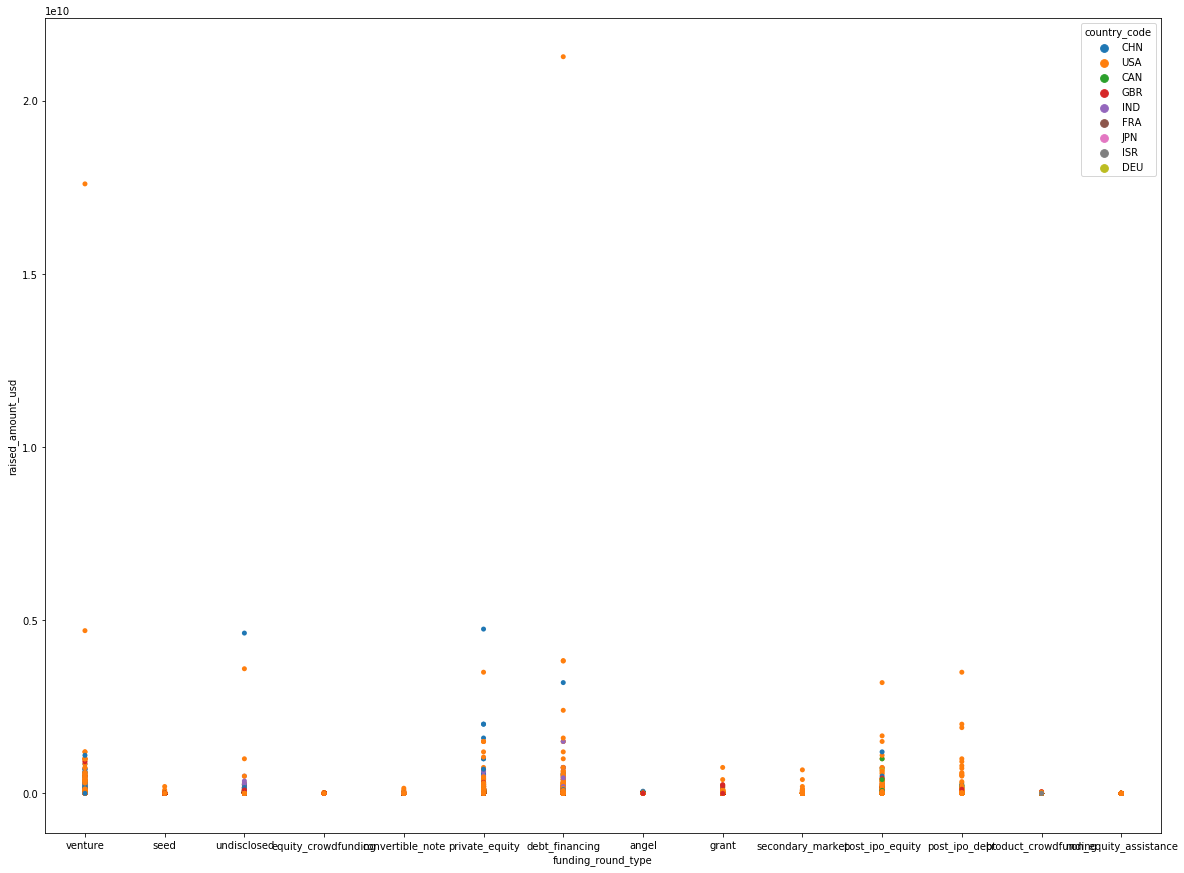

In [106]:
plt.subplots(figsize=(20,15))
sns.stripplot(x="funding_round_type", y="raised_amount_usd", hue="country_code", data=top9);

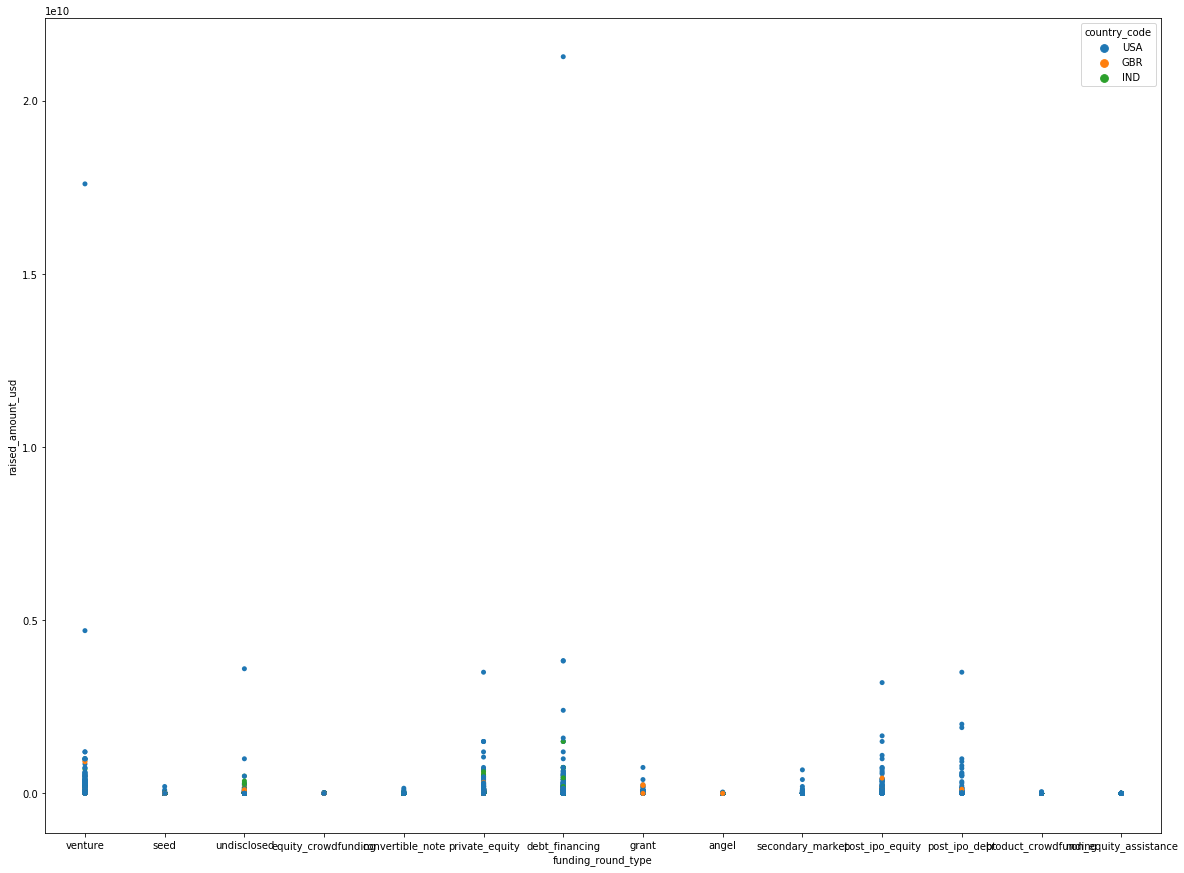

In [107]:
plt.subplots(figsize=(20,15))
sns.stripplot(x="funding_round_type", y="raised_amount_usd", hue="country_code", data=top3);

# Analysis summary

## Investment type analysis

Angel investment is the recommended investment type for the company

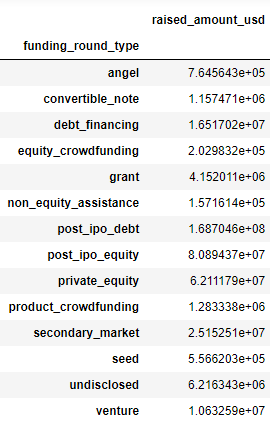

## Sector Analysis

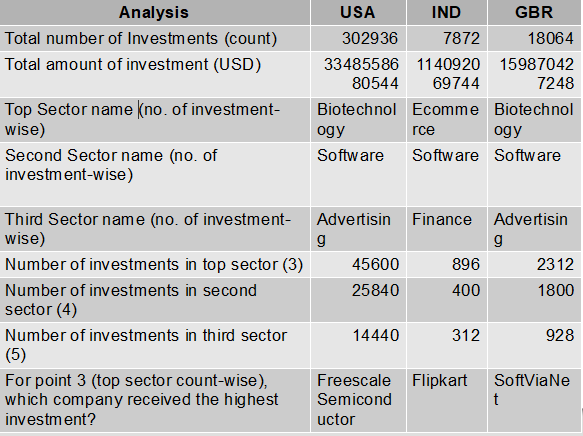

## Country analysis

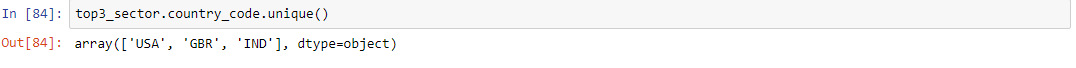

# Conclusions

From the analysis of the company data, it is clear the following trends emerge:
1. **Angel investment is the most suitable funding type.**
2. Investments made in **India, Great Britain and USA** are the most feasible.
3. **Biotechnology, Ecommerce and Software** are among the most recommended sectors for investment. 